# Assignment 4 - SUPRIO DUBEY(2013036)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as st
import scipy.special as spec
import seaborn as sns
from scipy.integrate import quad
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

%matplotlib inline
plt.style.use('ggplot')
np.random.seed(42)

## Question 1
**Give a Bayesian solution to Question 4 of assignment 4, where seven scientists of varying capabilities have measured $\mu$ with personal noise level $\sigma_n$ and we are interested in inferring $\mu$. Let the prior on each $\sigma_n$ be a broad prior, for example a $\Gamma$ distribution with parameters $(s,c)=(10,0.1)$. Find the posterior distribution for $\mu$. Plot it and explore its properties for a variety of data sets such as the one given and the data set $\{x_n\}=\{13.01,7.39\}$.** \
**[Hint: first find the posterior distribution of $\sigma_n$ given $\mu$ and $x_n$, $\mathcal{P}(\sigma_n|x_n,\mu)$. Note that the normalizing constant for this inference is $\mathcal{P}(x_n|\mu)$. Marginalize over $\sigma_n$ to find this normalizing constant, then use Bayes' theorem a second time to find $\mathcal{P}(\mu|\{x_n\})$.]**

|Scientist|$x_n$|
|:-:|:-:|
|A|-27.020|
|B|3.570|
|C|8.191|
|D|9.898|
|E|9.603|
|F|9.945|
|G|10.056|


## Answer 1.
The likelihood taking in to account one single $x_n$ is:
\begin{equation}
L(\mu,\{\sigma_n\})=P(\{x_n\}|\mu,\{\sigma_n\})=\prod_{n=1}^{N}P(x_n|\mu,\sigma_n)=\prod_{n=1}^{N}\frac{1}{\sqrt{2\pi\,\sigma_n^2}}\,e^{-(x_n-\mu)^2/2\sigma_n^2}\,,
\end{equation}
$N$ is the number of data (of different scientists).Calculating the posterior for $\mu$ given the data $\{x_n\}$. According to the Bayes theorem we can write:

\begin{equation}
P(\mu|\{x_n\})=\frac{P{(\{x_n\}|\mu)}P(\mu)}{P(\{x_n\})}\propto P(\{x_n\}|\mu)\,P(\mu)\,,
\end{equation}.

Considering a uniform prior $P(\mu)=1$ and the evidence at the denominator as a normalization constant<br>
We can write the above eqauation as:
\begin{equation}
P(\mu|\{x_n\})\propto P(\{x_n\}|\mu)= P(x_1,\dots,x_N|\mu)=\prod_{n=1}^N P(x_n|\mu)\,.
\end{equation}
T $P(x_n|\mu)$ can be marginalised on the corresponding $\sigma_n$ value,however on using tthe precision parameter $\beta_n=\sigma_n^{-2}$ the calculation is easier.<br>
Using the conjugate prior as a $\Gamma$ distribution, with rate parameter $s$ (= (the given $s$)$^{-1}$) and the shape parameter $c$:
\begin{equation}
\text{Gamma}(\beta_n;s,c)\equiv\frac{s}{\Gamma(c)}\,\beta_n^{\,c-1}\,e^{-s\beta_n}\,.
\end{equation}
Marginalizing $P(x_n|\mu)$, we have
\begin{equation}
\begin{split}
P(x_n|\mu)&=\int_0^{+\infty}d\beta_n\,P(x_n|\mu,\beta_n)\,P(\beta_n)\\
&=\int_0^{+\infty}d\beta_n\,\frac{\beta_n^{1/2}}{\sqrt{2\pi}}\,e^{-\beta_n(x_n-\mu)^2/2}\,\frac{s^c}{\Gamma(c)}\,\beta_n^{\,c-1}\,e^{-s\beta_n}\\
&=\frac{s^c}{\Gamma(c)\sqrt{2\pi}}\int_0^{+\infty}d\beta_n\,\beta_n^{\,c-1/2}\,e^{-\beta_n(s+(x_n-\mu)^2/2)}
\end{split}\,.
\end{equation}
Using the Gamma integral
\begin{equation}
\int_0^{+\infty}dt\,t^ae^{-bt}=\frac{\Gamma(a+1)}{b^{\,a+1}}\,,
\end{equation}
we can write the posterior as
\begin{equation}
P(\mu|\{x_n\})\propto\prod_{n=1}^N P(x_n|\mu)=\prod_{n=1}^N\frac{s^c}{\Gamma\sqrt{2\pi}}\,\frac{\Gamma(c+1/2)}{\bigl[s+(x_n-\mu)^2/2\bigr]^{c+1/2}}\,.
\end{equation}


In [43]:
def betafunc(beta,c,s):
    f=(s**c)*(beta**(c-1))*np.exp(-s*beta)/spec.gamma(c)
    return f

def sigmafunc(sigma,c,s):
    f=(s**c)*(sigma**(-(c+1)))*np.exp(-s/sigma)/spec.gamma(c)
    return f

def posterior(x,s,c):
    mu=np.arange(-30.,30.,0.1)
    sample=np.ones(len(mu),float)
    for j in range(len(x)):
        sample*=(s**c*spec.gamma(c+0.5)/(np.sqrt(2.*np.pi)*spec.gamma(c)*(s+(x[j]-mu)**2./2.)**(c+0.5)))
    return mu,sample


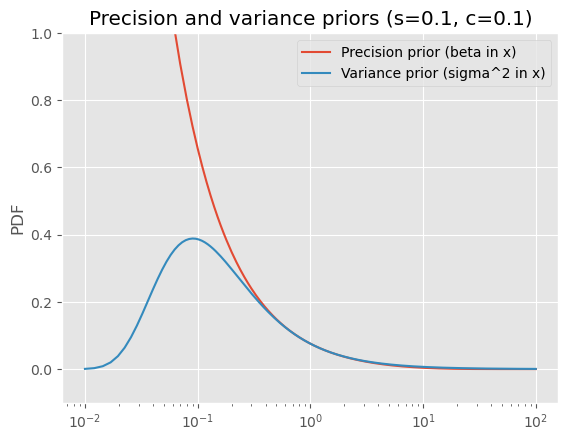

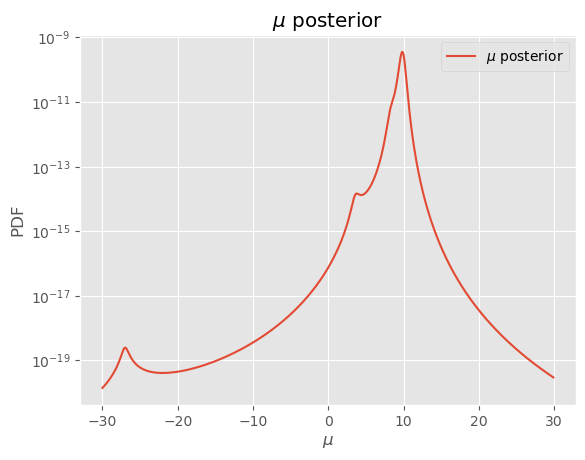

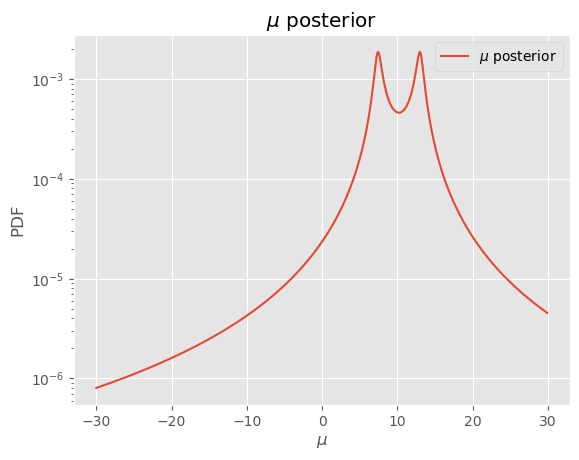

In [44]:
#### intialising s and c
s= 0.1
c= 0.1
x=np.array([-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056])
beta=np.arange(0.01,100.,0.01)
sigma=np.arange(0.1,10.,0.01)
var=np.copy(sigma)**2.
prior_beta=betafunc(beta,c,s)
prior_var=sigmafunc(var,c,s)
plt.plot(beta,prior_beta,label='Precision prior (beta in x)')
plt.plot(var,prior_var,label='Variance prior (sigma^2 in x)')
plt.legend()
plt.xscale('log')
plt.ylabel('PDF')
plt.ylim(-0.1,1.)
plt.title(f'Precision and variance priors (s={s}, c={c})')
plt.show()

mu,post_mu=posterior(x,s,c)
plt.plot(mu,post_mu,label='$\mu$ posterior')
plt.yscale('log')
plt.xlabel('$\mu$')
plt.ylabel('PDF')
plt.title('$\mu$ posterior')
plt.legend()
plt.show()

x2=np.array([13.01,7.39])
mu2,post_mu2=posterior(x2,s,c)
plt.plot(mu2,post_mu2,label='$\mu$ posterior')
plt.yscale('log')
plt.xlabel('$\mu$')
plt.ylabel('PDF')
plt.title('$\mu$ posterior')
plt.legend()
plt.show()





## Question 2
### Implement Gibbs sampling for the Question 1.

Gibbs' sampling is a Monte Carlo method that allows to sample (at the $t$ iteration) the set of values (sample) $\{\theta_n^{\,(t)}\}_{n=1}^N$ from a distribution $P(\vec{\theta})$ which is difficult to sample form.The sample $\{\theta_n^{\,(t)}\}_{n=1}^N$ that the Gibbs Sampling method wants to reach can be seen as the set of components of the $N$-dimensional vector
\begin{equation}
\vec{\theta}\,^{(t)}=\bigl(\theta_1^{\,(t)},\dots,\theta_N^{\,(t)}\bigr)\,.
\end{equation}
From the joint probabilities of the component of $P(\vec{\theta})$  we can sample the $n$-th component of $\vec{\theta}\,^{(t)}$. We startby guessing a vector $\vec{\theta}\,^{(t-1)}$, thanks to a first joint probability, one can sample an update for the corresponding $n$-th component, which can be substituted in $\vec{\theta}\,^{(t-1)}$ vector with the $t$-th value of iteration. Then, a second joint probability within input the update vector can be sampled. This until all components are updated. eg.
\begin{equation}
\begin{split}
&P(\theta_1^{\,(t)}|\theta_2^{\,(t-1)},\dots,\theta_N^{\,(t-1)})&\qquad\text{samples}&\qquad\theta_1^{\,(t)}\,,\\
&P(\theta_2^{\,(t)}|\theta_1^{\,(t)},\theta_3^{\,(t-1)},\dots,\theta_N^{\,(t-1)})&\qquad\text{samples}&\qquad\theta_2^{\,(t)}\,,\\
&\qquad\qquad\qquad\qquad\qquad\dots\\
&P(\theta_N^{\,(t)}|\theta_2^{\,(t)},\dots,\theta_{N-1}^{\,(t)})&\qquad\text{samples}&\qquad\theta_N^{\,(t)}\,.\\
\end{split}
\end{equation}

In our problem, we have
\begin{equation}
\vec{\theta}=(\mu,\sigma_1,\dots,\sigma_7)\,,
\end{equation}
from here we want to make an inference. Our distribution from which we want to sample $\{\mu,\{\sigma_n\}\}$ is the posterior $P(\mu,\{\sigma_n\}|\{x_n\})$. Using the Bayes theorem, we have
\begin{equation}
P(\mu,\{\sigma_n\}|\{x_n\})=\frac{P(\{x_n\}|\mu,\{\sigma_n\})\,P(\mu,\{\sigma_n\})}{P(\{x_n\})}\,,
\end{equation}
where $n$ in the $n$-th scientist index, for a total of $N=7$ scientists. Different components of our $\vec{\theta}$ could be taken independently and we decide to take the prior on $\mu$ as uniform, to have a non-informative one. This means
\begin{equation}
\begin{split}
P(\mu,\{\sigma_n\}|\{x_n\})&\propto P(\{x_n\}|\mu,\{\sigma_n\})\,P(\mu,\{\sigma_n\})\\
&=P(\{x_n\}|\mu,\{\sigma_n\})\,P(\mu)\,\prod_{n=1}^N P(\{\sigma_n\})\\
&=P(\{x_n\}|\mu,\{\sigma_n\})\,\prod_{n=1}^NP(\{\sigma_n\})\\
&=L(\mu,\{\sigma_n\})\,\prod_{n=1}^N P(\sigma_n)\\
\end{split}\,.
\end{equation}
The first term is the Gaussian likelihood seen in the Question 1, while $P(\sigma_n)$ is the Inverse-$\Gamma$ distribution for $\sigma_n^2$ in input. <br>
We care about are the joint probabilities $P(\mu|\{\sigma_n\},\{x_n\})$ and $P(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})$, where $x$ are data from seven scientists. They are important to sample updates respectively for $\mu$ and $\sigma_n$.Analysing them separately
Using the Bayes theorem for $P(\mu|\{\sigma_n\},x)$, we have
\begin{equation}
P(\mu|\{\sigma_n\},\{x_n\})=\frac{P(\{x_n\}|\mu,\{\sigma_n\})\,P(\mu|\{\sigma_n\})}{P(\{x_n\}|\{\sigma_n\})}\propto L(\mu,\{\sigma_n\})\,P(\mu|\{\sigma_n\})\,.
\end{equation}
Assuming $P(\mu|\{\sigma_n\})=1$ (uninformative prior), we have
\begin{equation}
P(\mu|\{\sigma_n\},\{x_n\})\propto L(\mu,\{\sigma_n\})=\prod_{n=1}^{N}\frac{1}{\sqrt{2\pi\,\sigma_n^2}}\,\exp\biggl[-\frac{(x_n-\mu)^2}{2\sigma_n^2}\biggr]\,.
\end{equation}
Since we are assuming that $\{\sigma_n\}$ and $\{x_n\}$ are given, they can be taken as constants. So, we have
\begin{equation}
\begin{split}
P(\mu|\{\sigma_n\},\{x_n\})&\propto \exp\biggl[-\sum_n\frac{(x_n-\mu)^2}{2\sigma_n^2}\biggr]\\
&\propto \exp\biggl[-\sum_n\frac{\mu^2-2\mu x_n}{2\sigma_n^2}\biggr]\\
&=\exp\biggl[-\sum_n\frac{\mu^2}{2\sigma_n^2}+\sum_n\frac{\mu x_n}{\sigma_n^2}\biggr]
\end{split}\,.
\end{equation}
Defining
\begin{equation}
A=\sum_n\frac{1}{\sigma_n^2}\,,\qquad B=\sum_n\frac{x_n}{\sigma_n^2}\,,
\end{equation}
we have
\begin{equation}
\begin{split}
P(\mu|\{\sigma_n\},\{x_n\})&\propto \exp\biggl[-\frac{\mu^2A}{2}+\mu B\biggr]\\
&=\exp\biggl[-\frac{A}{2}\biggl(\mu^2-2\mu\,\frac{B}{A}\biggr)\biggr]\\
&=\exp\biggl[-\frac{A}{2}\biggl(\mu^2-2\mu \frac{B}{A}+\frac{B^2}{A^2}-\frac{B^2}{A^2}\biggr)\biggr]\\
&\propto \exp\Biggl[-\frac{A}{2}\biggl(\mu-\frac{B}{A}\biggr)^2\Biggr]\\
&=\exp\biggl[-\frac{(\mu-B/A)^2}{2/A}\biggr]
\end{split}\,.
\end{equation}
In conclusion, the distribution from which we can sample $\mu$ is
\begin{equation}
P(\mu|\{\sigma_n\},\{x_n\})\propto\exp\biggl[-\frac{(\mu-B/A)^2}{2/A}\biggr]\equiv \text{Normal}\biggl(\mu;\frac{B}{A},\frac{1}{A}\biggr)\,,
\end{equation}
a Gaussian with $B/A$ mean and $1/A$ variance.
* For what concerns $P(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})$, we can use again the Bayes theorem:
\begin{equation}
\begin{split}
\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})&=\frac{P(\{x_n\}|\mu,\{\sigma_n\})\,P(\sigma_n|\mu,\{\sigma_m\}_{m\ne n})}{P(\{x_n\}|\mu,\{\sigma_m\}_{m\ne n})}\\
&\propto L(\mu,\{\sigma_n\})\,P(\sigma_n|\mu,\{\sigma_m\}_{m\ne n})
\end{split}\,.
\end{equation}
Since everything that doesn't depend on $\sigma_n$ is constant, we can say
\begin{equation}
\begin{split}
P(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})&\propto\Biggl(\prod_{m=1}^N\frac{1}{\sqrt{2\pi\,\sigma_m^2}}\,e^{-(x_m-\mu)^2/2\sigma_m^2}\Biggr)\,P(\sigma_n|\mu,\{\sigma_m\}_{m\ne n})\\
&\propto\frac{1}{\sqrt{\sigma_n^2}}\,e^{-(x_n-\mu)^2/2\sigma_n^2}\,P(\sigma_n|\mu,\{\sigma_m\}_{m\ne n})
\end{split}\,.
\end{equation}
As we said, for $\sigma_n$ we have an Inverse-$\Gamma$ with $\sigma_n^2$ in input, so
\begin{equation}
\begin{split}
P(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})&\propto\frac{1}{\sqrt{\sigma_n^2}}\,e^{-(x_n-\mu)^2/2\sigma_n^2}\,\biggl(\frac{1}{\sigma_n^2}\biggr)^{c+1}e^{-s/\sigma_n^2}\\
&=\sigma_n^{-2(c+3/2)}\,e^{-[2s+(x_n-\mu)^2]/2\sigma_n^2}
\end{split}\,.
\end{equation}
Taking
\begin{equation}
c^*=c+\frac{1}{2}\,,\qquad s^*=\frac{2s+(x_n-\mu)^2}{2}\,,
\end{equation}
we have
\begin{equation}
P(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})\propto\biggl(\frac{1}{\sigma_n^2}\biggr)^{c^*+1}e^{-s^*/\sigma_n^2}\equiv\text{Inv-Gamma}(\sigma_n^2;s^*,c^*)\,.
\end{equation}

Summarizing, we have, to update parameters,
\begin{equation}
\begin{split}
P(\mu|\{\sigma_n\},\{x_n\})&\propto\text{Normal}\biggl(\mu;\frac{B}{A},\frac{1}{A}\biggr)\\
P(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})&\propto\text{Inv-Gamma}\Bigl(\sigma_n^2;s^*,c^*\Bigr)
\end{split}\,.
\end{equation}


For the code below samples from $\Gamma$ distribution will be taken  instead from an inverse-$\Gamma$ which is a purely computational problem, since there is no simple function in Python to sample from an inverse-$\Gamma$. The relation between the two is really simple:
\begin{equation}
\begin{split}
\text{I-}\Gamma(\sigma_n^2;c^*,s^*)&\qquad \text{samples} \qquad \sigma_n^2\,,\\
\Gamma(\beta_n;c^*,s^*)&\qquad \text{samples} \qquad \beta_n\,,
\end{split}
\end{equation}
where $\beta_n=\sigma_n^{-2}$ and $s^*$ is the rate parameter. To have $\sigma_n$ samples we can sample $\beta_n$ and isolate $\sigma_n=\beta_n^{-1/2}$.

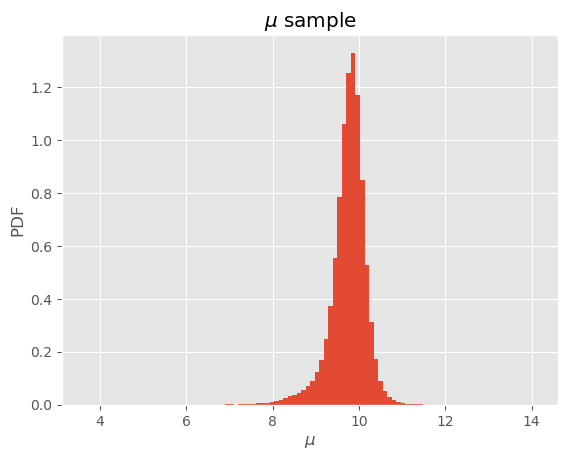

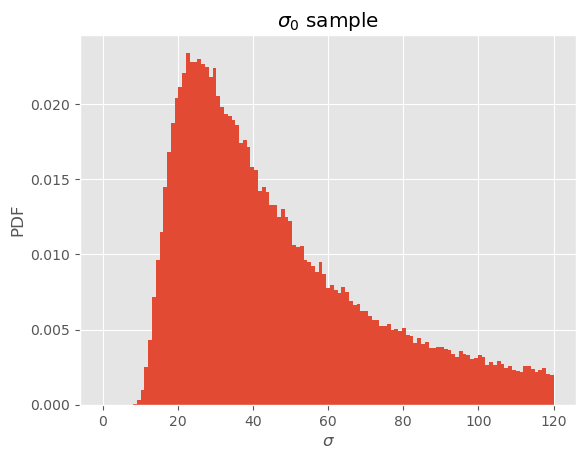

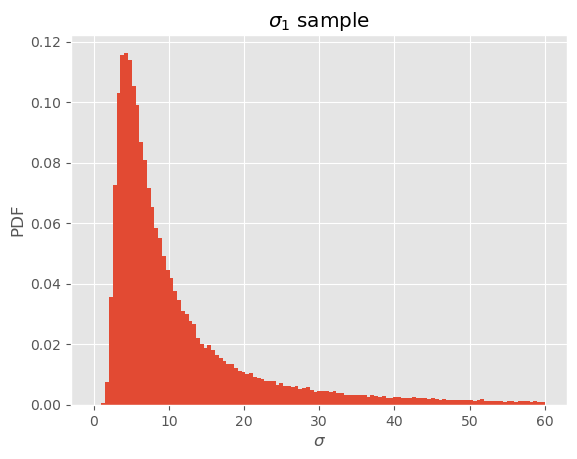

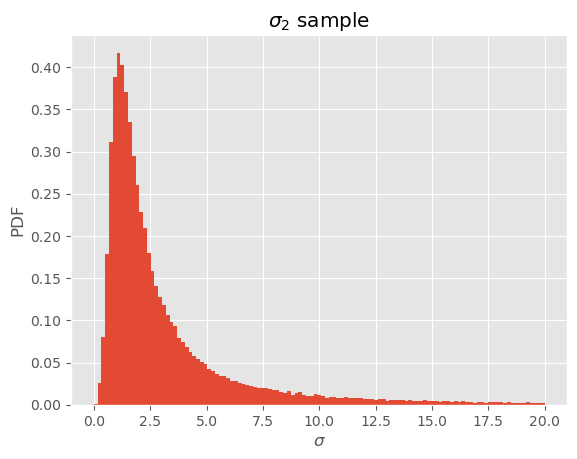

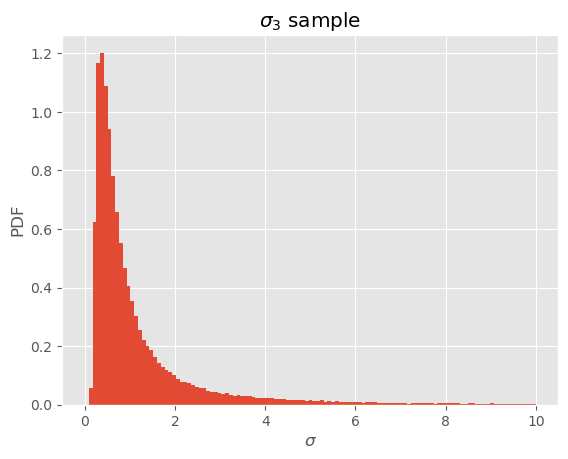

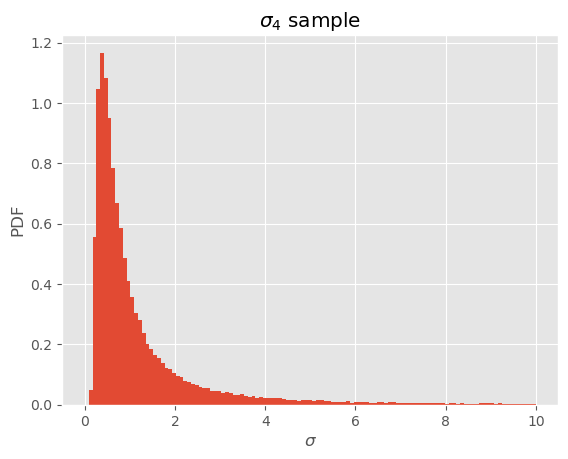

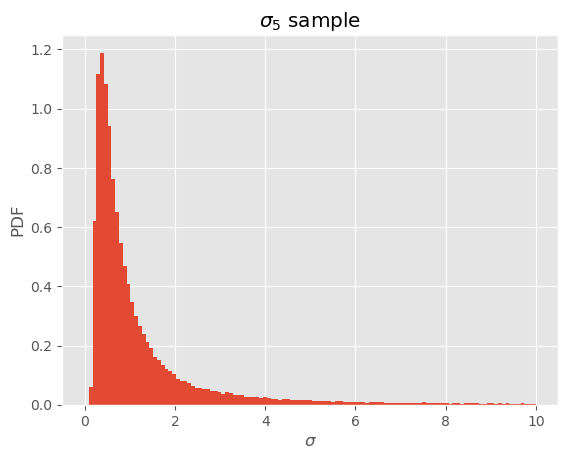

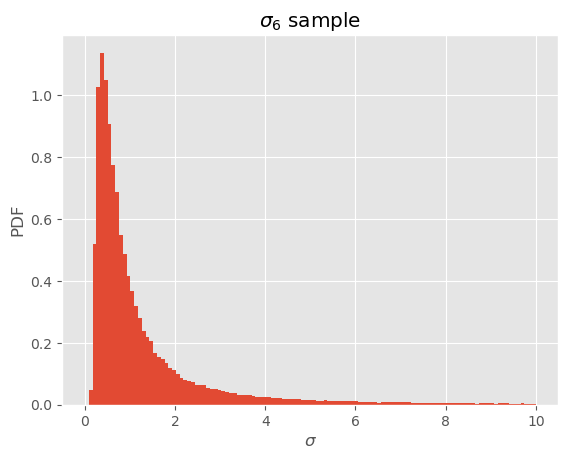

In [45]:
Niteration=100000
N=len(x)
mu=np.zeros(Niteration,float)
beta=np.ones([N,Niteration],float)


for i in range(Niteration):
    a=np.sum(beta[:,i-1])
    b=np.sum(x[:]*beta[:,i-1])
    mu[i]=np.random.normal(b/a,1/np.sqrt(a))
    for j in range(N):
        snew=2./(2.*s+(x[j]-mu[i])**2.)
        beta[j,i]=np.random.gamma(c+0.5,snew)

plt.hist(mu,bins=100,density='True')
plt.title('$\mu$ sample')
plt.xlabel('$\mu$')
plt.ylabel('PDF')
plt.show()
sigma=1./np.sqrt(beta)
bins_a=[120,60,20,10,10,10,10]
for i in range(N):
  mybins=np.linspace(0,bins_a[i],120)
  plt.hist(sigma[i],bins=mybins,density='True')
  plt.title(f'$\sigma_{i}$ sample')
  plt.xlabel('$\sigma$')
  plt.ylabel('PDF')
  plt.show()

## Question 3:
 The following PDF
$$ P(x,y) = e^{\frac{- x^2y^2 - x^2 - y^2}{Z}} $$ is a NON-Gaussian joint distribution whose conditional distributions are all Gaussian.
- [Optional] Calculate the conditional $P(x|y)$ and $P(y|x)$
- If you are not able to calculate the conditionals, try to generate samples from P using rejection sampling or
  Metropolis algorithm or slice sampling or Gibbs if you have solved the optional question in Q3.
- Why not use samples from importance sampling?

## Answer 3. 

Given the following PDF: 
\begin{equation*}
P(x,y) = e^{\frac{- x^2y^2 - x^2 - y^2}{Z}} . 
\label{eq:1}\tag{1}
\end{equation*}

We can solve the conditional probability: 

\begin{equation*}
P(x|y) P(y)= P(x,y)
\label{eq:2}\tag{2}
\end{equation*}

Assuming a uniform prior $P(y)$<br>:

\begin{equation*}
P(x,y)\propto P(x|y) 
\label{eq:3}\tag{3}
\end{equation*}<br>


Let's see them separately.
* $P(x|y)$ suppose $y$ as fixed, so
\begin{equation}
\begin{split}
P(x|y)&\propto\frac{1}{Z}\,e^{-x^2-y^2-x^2y^2}\\
&\propto\frac{1}{Z}\,e^{-x^2-x^2y^2}\\
&\propto\frac{1}{Z}e^{-x^2}e^{-y^2(1+x^2)}\\
&\equiv Normal\biggl(x=0,\sigma^2=\frac{1}{2(y^2+1)}\biggr)
\end{split}\,.
\end{equation}
Simillarly we see $P(y|x)$.
* $P(y|x)$ suppose $y$ as fixed, so
\begin{equation}
\begin{split}
P(y|x)&\propto\frac{1}{Z}\,e^{-y^2-x^2-x^2y^2}\\
&\propto\frac{1}{Z}\,e^{-y^2-x^2y^2}\\
&\propto\frac{1}{Z}e^{-y^2}e^{-x^2(1+y^2)}\\
&\equiv Normal\biggl(y=0,\sigma^2=\frac{1}{2(x^2+1)}\biggr)
\end{split}\,.
\end{equation}
Where 
\begin{equation}
Z =\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty}P(x,y) \,dx\,dy
\end{equation}


### Now let us try to calculate the conditionals by generating samples using Gibbs Sampling


In [46]:
def P(x,y):
    f = lambda x,y : np.exp( (-(x*y)**2- y**2 -x**2 ))
    Z = dblquad(f, -np.inf, np.inf, -np.inf, np.inf)
    return np.exp( (-(x*y)**2- y**2 -x**2 ))/Z[0]

def sig(x):
    f=np.sqrt(1/(2*(1+x**2)))
    return f

def gibbssampling(Niteration = 1000):
    theta =np.zeros([2,Niteration],float)
    
    for i in range(Niteration):
        theta[0,i]=np.random.normal(0,sig(theta[1,i-1]))
        theta[1,i]=np.random.normal(0,sig(theta[0,i]))
    
    return np.array(theta[0]),np.array(theta[1])
samples = gibbssampling(Niteration=100000) 



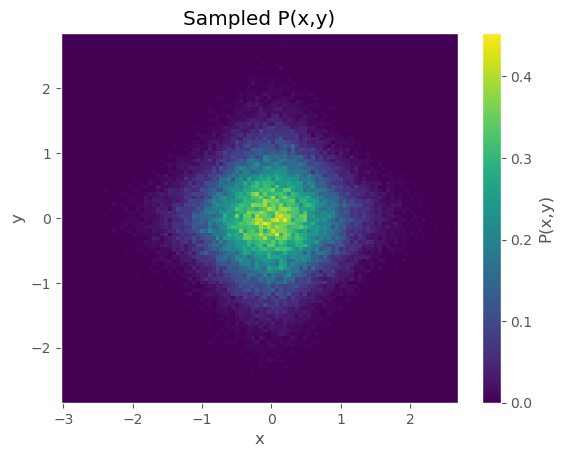

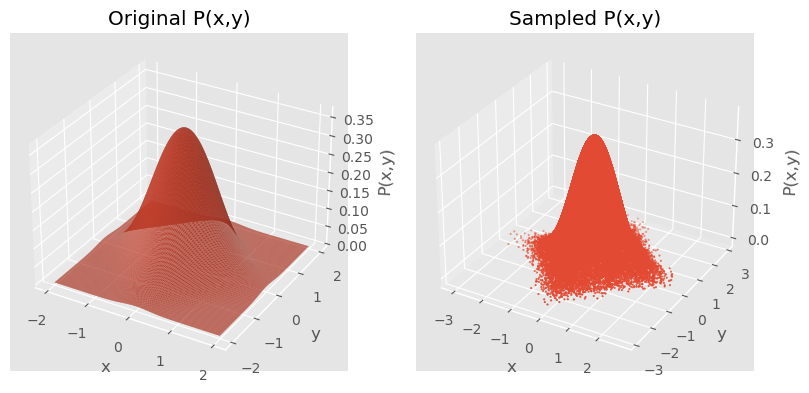

In [47]:
z = P(samples[0],samples[1])

plt.hist2d(samples[0],samples[1],bins=100,density='True')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='P(x,y)')
plt.title('Sampled P(x,y)')
plt.show()


x = np.arange(-2,2,0.01)
y = np.arange(-2,2,0.01)
X, Y = np.meshgrid(x, y)
z = P(X,Y)
fig=plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1,2,1,projection='3d' )
ax1.plot_surface(X, Y, z, cstride=2, rstride=2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('P(x,y)')
ax1.set_title('Original P(x,y)')

z = P(samples[0],samples[1])
ax2 = fig.add_subplot(1,2,2,projection='3d' )
ax2.scatter(samples[0],samples[1],z,s=1)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('P(x,y)')
ax2.set_title('Sampled P(x,y)')
plt.show()

We dont use importance sampling because in importance sampling we consider a proposed distribution $Q(x,y)$ and the choice of it largely determines the sample being drawn. So as long as $Q(x,y)$ is not a good approximation to $P(x,y)$ it takes a significant amount of time to sample.<br>
Alos ,if we even obtain samples,the weights associated with thosesamples are likely to vary by large factors, because the probabilities of points in a typical set, although similar to each other, still differ by factors of order $exp(\sqrt{N})$, so the weights will too, unless Q is a near-perfect approximation to
P.

## Question 4:
$P(x) = \frac{P^*(x)}{Z}$ where $P^*(x) = exp(0.4*(x - 0.4)^2 -0.08*x^4)$
- Generate samples for P using rejection sampling or metropolis algorithm
- Generate samples for P using CDF method
- How can you test whether two samples are pulled from the same population? Do it for the samples generated in Q4 (one with CDF the other from rejection, Metropolis or slice sampling)

## Answer 4:
$P(x)$  is the density from which we wish to draw samples, which can be evaluated, at least to within a multiplicative constant i.e evaluate a function $P^∗(x)$ such that
$P (x) = \frac{P^∗(x)}{Z}$.It is difficult to sample from $P(x)$ as it is difficult to know the normalising constant $Z$ ,and also if it is known, it is difficult to sample  form $P$  especially in high-dimensional spaces.
Here in the question  $P^*(x) = exp(0.4*(x - 0.4)^2 -0.08*x^4)$.Which is defined below.


## Rejection Sampling

In [48]:
def pstar(x):
    f = np.exp(0.4*(x-0.4)**2-0.08*x**4)
    return f
def p(x):
    z = quad(pstar, -np.inf, np.inf)
    return pstar(x)/z[0]    

Now let us define a proposal distribution $Q^*$ as a Guassian distribution up to normal constant.

In [49]:
def qstar(x):
    q = st.norm.pdf(x, loc=0, scale=1.73)
    return q

In [50]:
x = np.linspace(-6,6,300)


c = max(pstar(x)/qstar(x))
print(c)


23.54899392192762


Text(0.5, 0, 'x')

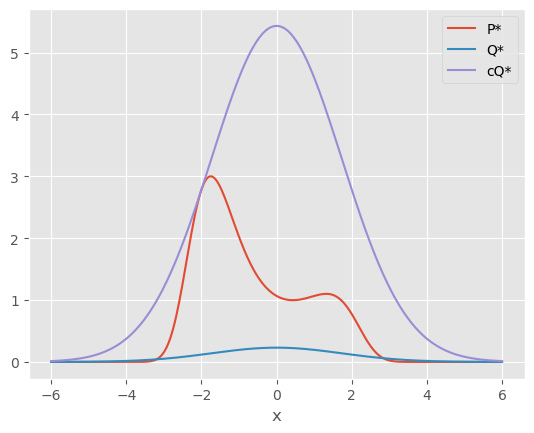

In [51]:
### Plot ####
plt.plot(x, pstar(x), label='P*')
plt.plot(x, qstar(x), label='Q*')
plt.plot(x, c*qstar(x), label ='cQ*')
plt.legend(loc = 1)
plt.xlabel('x')


In [52]:
def rejection_sampling(Niteration = 10):
    sample = []
    
    for i in range(Niteration):
        
        x_new = np.random.normal(0,1.73)
        #print('tt',x_new)
        u = np.random.uniform(0,c*qstar(x_new))
        #print(u)
        #print(pstar(x_new))
        if u <= pstar(x_new):
            sample.append(x_new)
    #print('rs',Niteration)
    return np.array(sample)
    
    
    


33220


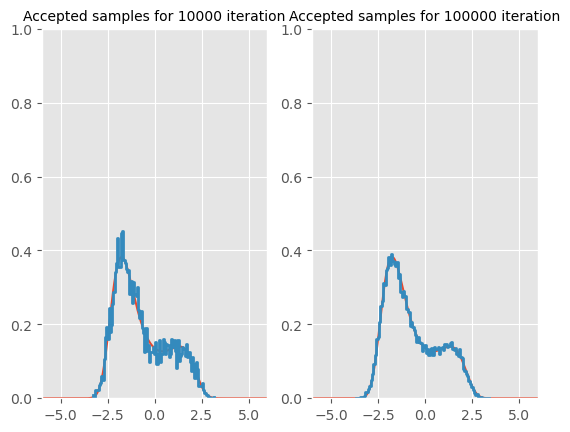

In [53]:


plt.subplot(121)

plt.plot(x, p(x), label='P')
factor = 7.85218 # Integrated value of P_star(x) from -6 to 6.

hist, bin_edges = np.histogram(rejection_sampling(Niteration=10000), bins=100, density=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

plt.step(bin_centers, hist, linewidth=2)



plt.axis([-6,6,0,1])

plt.title('Accepted samples for 10000 iteration', fontsize=10);


plt.subplot(122)
plt.plot(x, p(x), label='P')
factor = 7.85218 # Integrated value of P_star(x) from -6 to 6.
temp1=rejection_sampling(Niteration=100000)
print(len(temp1))

hist, bin_edges = np.histogram(rejection_sampling(Niteration=100000), bins=100, density=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

plt.step(bin_centers, hist, linewidth=2)



plt.axis([-6,6,0,1])

plt.title('Accepted samples for 100000 iteration', fontsize=10);


## Metropolis-Hasting 
Makes use of a proposal density $Q$ which depends on the current state $x^{t}$ . The density $Q(x' ; x^{t})$ might be a simple distribution such as a Gaussian centred on the current $x^{t}$ .<br>
The proposal density $Q(x' ; x)$ can be any fixed density from which we can draw samples. In contrast to rejection sampling, it is notnecessary that $Q(x'; x^{t})$ look at all similar to $P(x)$.However in the code below the same distribution as rejection sampling is considered.<br>
We assume that we can evaluate $P^∗(x)$ for any $x$. A tentative
new state $x'$ is generated from the proposal density $Q(x' ; x^{t})$.
\begin{equation*}
a= \frac{P ∗(x') Q(x^{t} ; x')}{P^∗(x^{t}) Q(x' ; x^{t})}
\label{eq:4}\tag{4}
\end{equation*}
If $a ≥ 1$ then the we  accept the new.<br>
Otherwise, the new state is accepted with probability a.
-If the step is accepted, we set $x^{t+1} = x'$ .
-If the step is rejected, then we set $x^{t+1} = x^{t}$.
The difference from rejection sampling i.e in rejection sampling, rejected
points are discarded and have no influence on the list of samples ${x(r)}$ that are collected

In [54]:
def mhasting(Niteration = 1000):

    sample=[0]
    acceptance = 0
    for i in range (Niteration-1):
        xt = sample[i]
        
        x_new = np.random.normal(0,1.73)
        a = ((pstar(x_new)*qstar(xt)))/((pstar(xt)*qstar(x_new)))
        r = np.random.uniform(0,1)
        if a >= 1 or r<=a :
            sample.append(x_new)
            acceptance+=1
        else:
            sample.append(xt)
    print(acceptance)
    accept=acceptance/Niteration
    print('Efficiency',accept)
    return np.array(sample)
    

6075
Efficiency 0.6075
61808
Efficiency 0.61808
ms_len 100000
61146
Efficiency 0.61146


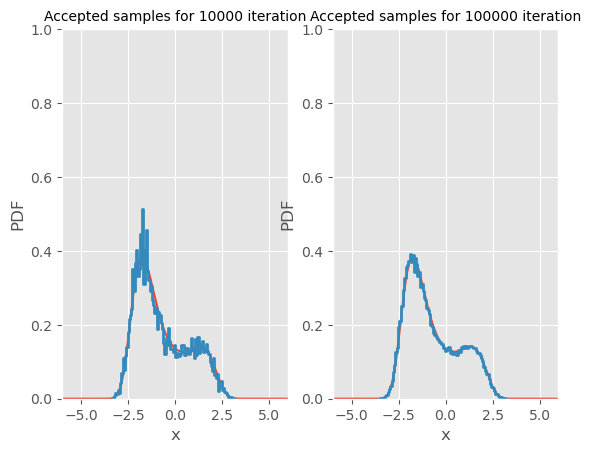

In [55]:
plt.subplot(121)

plt.plot(x, p(x), label='P')
factor = 7.85218 # Integrated value of P_star(x) from -6 to 6.

hist, bin_edges = np.histogram(mhasting(Niteration=10000), bins=100, density=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

plt.step(bin_centers, hist, linewidth=2)


plt.xlabel('x')
plt.ylabel('PDF')
plt.axis([-6,6,0,1])

plt.title('Accepted samples for 10000 iteration', fontsize=10);


plt.subplot(122)
plt.plot(x, p(x), label='P')
factor = 7.85218 # Integrated value of P_star(x) from -6 to 6.
tempp = mhasting(Niteration=100000)
print('ms_len',len(tempp))
hist, bin_edges = np.histogram(mhasting(Niteration=100000), bins=100, density=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

plt.step(bin_centers, hist, linewidth=2)


plt.xlabel('x')
plt.ylabel('PDF')
plt.axis([-6,6,0,1])

plt.title('Accepted samples for 100000 iteration', fontsize=10);


## Cumulative Distribution Function
Also known as the cumulative probability function os defined as
\begin{equation*}
\phi(x) = \int_{-\infty}^{x} P(z)\,dz  
\label{eq:5}\tag{5}
\end{equation*}

100000


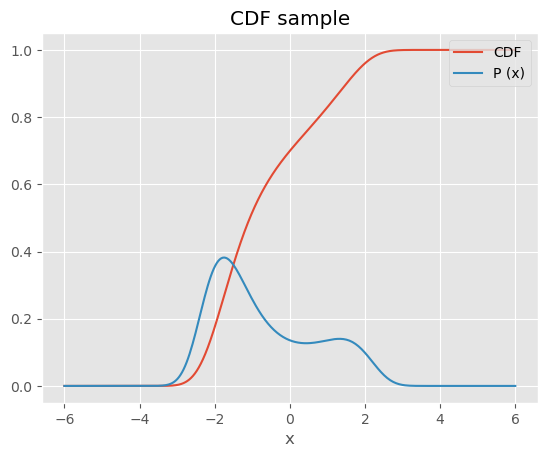

10000
10000


In [56]:

def cdf(Niteration=1000): 
    y= np.linspace(-6,6,Niteration)
    f =np.cumsum(p(y))
    f/=np.max(f)
    return y,f
temp = cdf(Niteration)[1]
print(len(temp))
plt.plot(cdf(Niteration)[0],cdf(Niteration)[1],label='CDF')
plt.plot(x,p(x),label='P (x)')
plt.legend(loc = 1)
plt.xlabel('x')
plt.title('CDF sample')
plt.show()
a,b = cdf(Niteration)

def CDF(Niteration=1000):
    print(Niteration)
    a,b = cdf(Niteration)
    sample =[]
    
    for i in range(len(a)):
#         print(c)
        u = np.random.uniform(0,1)
#         print(u,np.argmin(np.abs(cdf(Niteration)[1]-u)))
#         print(len(x))
        z = a[np.argmin(np.abs(cdf(Niteration)[1]-u))]
        sample.append(z)
        
    
    return np.array(sample)   
        

test = CDF(Niteration = 10000)  
print(len(test))
   
        


10000
100000


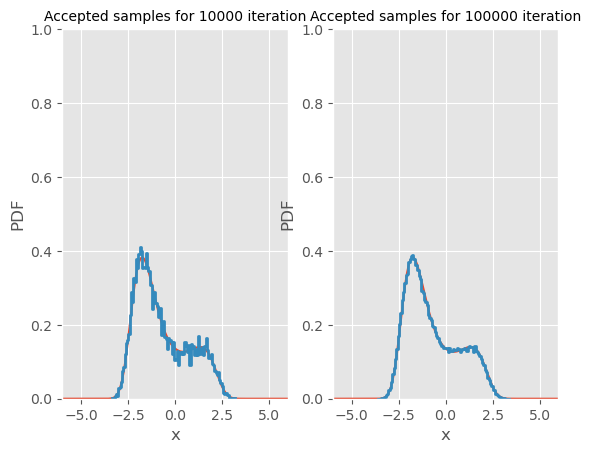

In [57]:

plt.subplot(121)
plt.plot(x, p(x), label='P')
hist, bin_edges = np.histogram(CDF(10000), bins=100, density=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

plt.step(bin_centers, hist, linewidth=2)


plt.xlabel('x')
plt.ylabel('PDF')
plt.axis([-6,6,0,1])

plt.title('Accepted samples for 10000 iteration', fontsize=10);
plt.subplot(122)

plt.plot(x, p(x), label='P')
# x,y =  cdf(100000)
# print(len(x))
# sam,c  = CDF(100000)
# print(c)
hist, bin_edges = np.histogram(CDF(100000), bins=100, density=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

plt.step(bin_centers, hist, linewidth=2)


plt.xlabel('x')
plt.ylabel('PDF')
plt.axis([-6,6,0,1])

plt.title('Accepted samples for 100000 iteration', fontsize=10);

Now let us see if the two samples are pulled from the same population

100
70
Efficiency 0.7
10000
6199
Efficiency 0.6199


Text(0, 0.5, 'Sample')

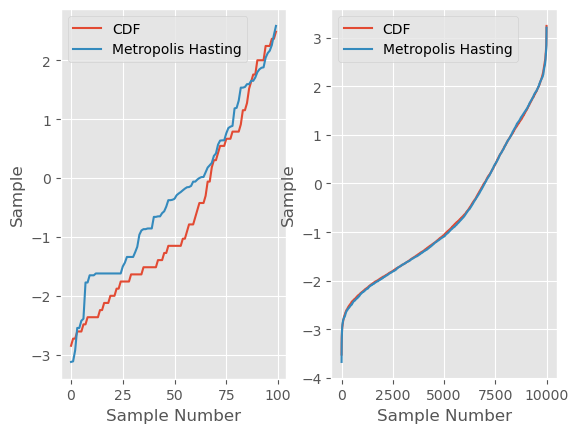

In [58]:

plt.subplot(121)
Number = 100
N = np.arange(Number)
sort_cdf= np.sort(CDF(Number))
sort_mh = np.sort(mhasting(Niteration=Number))

plt.plot(N,sort_cdf,label='CDF')
plt.plot(N,sort_mh,label='Metropolis Hasting')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Sample')

plt.subplot(122)
Number = 10000
N = np.arange(Number)
sort_cdf= np.sort(CDF(Number))
sort_mh = np.sort(mhasting(Niteration=Number))

plt.plot(N,sort_cdf,label='CDF')
plt.plot(N,sort_mh,label='Metropolis Hasting')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Sample')


Here we sorted the samples obtained by CDF and Metropolis Hasting and then we compare it.We can see as the number of samples increases the curves gets closer, so we can say that the two samples are pulled from the same population.